## K-Means Clustering 
- K-means clustering is a popular unsupervised machine learning algorithm used for partitioning a dataset into K distinct, non-overlapping subsets (clusters).
- The algorithm works iteratively to assign each data point to one of K clusters based on certain features.
- The goal is to minimize the sum of squared distances between data points and their assigned cluster centroids.

## Approach
#### These steps outline the process to be followed when working on a predictive model using Unsupervised Machine Learning Algorithms: 
- Problem Definition
- Data Collection
- Data Preprocessing
- Feature Selection/Engineering
- Data Splitting - No use here as we are finding patterns and insights.
- Model Selection
- Model Training and Prediction (Performed in same step)
- Hyperparameter Tuning
- Model Evaluation



## Problem Definition

### *Clearly state the problem you want to solve, as well as the outcome you want to predict.*


Here we have to predict the person's income based on its age using K-Means Clustering. 

In [5]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings('ignore')

## Data Collection

### *Gather relevant data that will be used to train and test the prediction model.*


In [6]:
df = pd.read_csv("Income_practice.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


## Data Preprocessing


### *Clean the data by handling missing values, dealing with outliers, data visualization, normalizing features, and encoding categorical variables.*


Text(0, 0.5, 'Income($)')

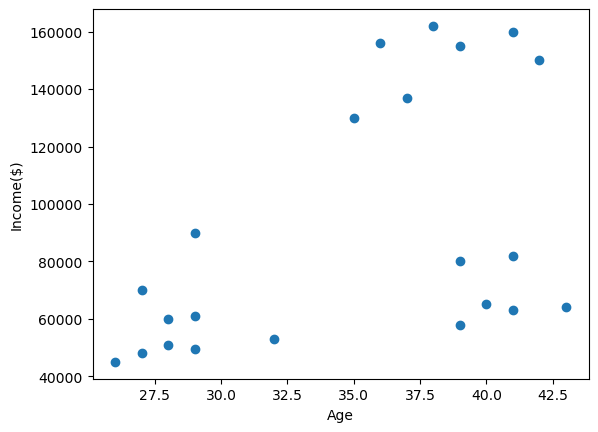

In [7]:
plt.scatter(df.Age , df['Income($)'])
plt.xlabel("Age")
plt.ylabel("Income($)")

In [ ]:
# Just go through how it's working

In [8]:
# Importing machine libraries
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
y_pred = km.fit_predict(df[['Age' , 'Income($)']])

In [9]:
y_pred

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [10]:
df['Cluster'] = y_pred
df.head()

,Name,Age,Income($),Cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


In [11]:
km.cluster_centers_

array([[3.29090909e+01, 5.61363636e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04]])

In [12]:
df1 = df[df.Cluster == 0]
df2 = df[df.Cluster == 1]
df3 = df[df.Cluster == 2]

Text(0, 0.5, 'Income')

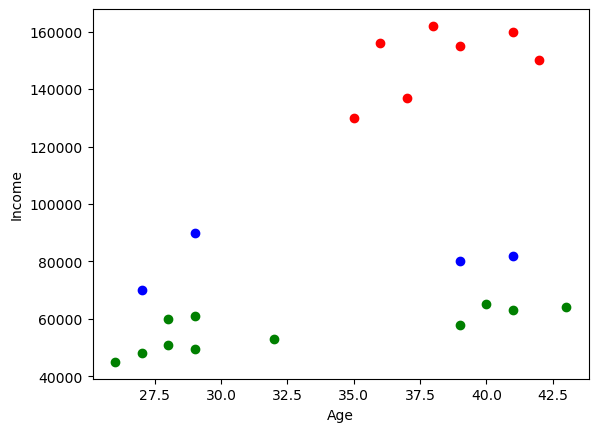

In [13]:
plt.scatter(df1.Age , df1['Income($)'] , color = 'green')
plt.scatter(df2.Age , df2['Income($)'] , color = 'red')
plt.scatter(df3.Age , df3['Income($)'] , color = 'blue')
plt.xlabel("Age")
plt.ylabel("Income")

## Feature Selection/Engineering

### *Identify which features are important for the prediction task and create new features if needed.*


In [22]:
# Scaling features at same scale
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

# Same for Age
scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])
df.head()

,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


## Data Splitting

### *Divide the datasets into a training set and a testing set to evaluate your model's performance.*

### *In Unsupervised Learning there is no need for data splitting as we don't have any labelled data.*

No Need !!! 

## Model Selection

### *Choose an appropriate machine learning algorithm based on the type of problem (classification, regression, etc.) and the characteristics of the data.*

In [23]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)

## Model Training and Prediction

### *Use the training data to train the selected model by adjusting its parameters to minimize the prediction error.* & *Once the model is trained and validated, it can be used to make predictions on new, unseen data.*

In [24]:
y_pred = km.fit_predict(df[['Age' , 'Income($)']])
df['Cluster'] = y_pred
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

In [20]:
df1 = df[df.Cluster == 0]
df2 = df[df.Cluster == 1]
df3 = df[df.Cluster == 2]

Text(0, 0.5, 'Income')

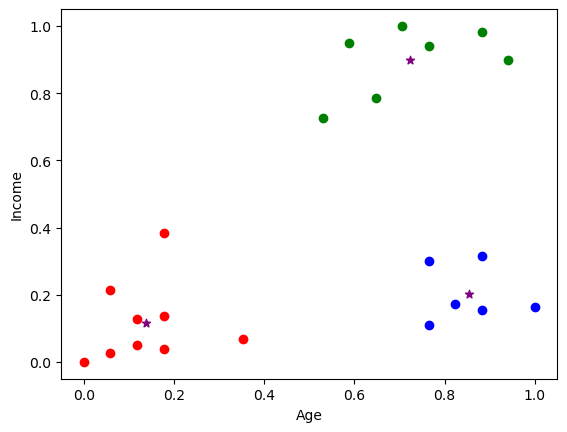

In [21]:
plt.scatter(df1.Age , df1['Income($)'] , color = 'green')
plt.scatter(df2.Age , df2['Income($)'] , color = 'red')
plt.scatter(df3.Age , df3['Income($)'] , color = 'blue')
plt.scatter(km.cluster_centers_[: , 0] , km.cluster_centers_[:,1],color = 'purple' , marker="*" , label = "Centroid")
plt.xlabel("Age")
plt.ylabel("Income")

## Hyperparameter Tuning

### *Fine-tune the model's hyperparameters to optimize its performance.*


In [52]:
k_rng = range(1, 10)
sse = []

for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[df['Age'], df['Income($)']])
    sse.append(km.inertia_)

InvalidIndexError: (0     0.058824
1     0.176471
2     0.176471
3     0.117647
4     0.941176
5     0.764706
6     0.882353
7     0.705882
8     0.588235
9     0.529412
10    0.647059
11    0.000000
12    0.058824
13    0.117647
14    0.176471
15    0.352941
16    0.823529
17    0.882353
18    1.000000
19    0.764706
20    0.882353
21    0.764706
Name: Age, dtype: float64, 0     0.213675
1     0.384615
2     0.136752
3     0.128205
4     0.897436
5     0.940171
6     0.982906
7     1.000000
8     0.948718
9     0.726496
10    0.786325
11    0.000000
12    0.025641
13    0.051282
14    0.038462
15    0.068376
16    0.170940
17    0.153846
18    0.162393
19    0.299145
20    0.316239
21    0.111111
Name: Income($), dtype: float64)

In [42]:
df

,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


## Model Evaluation

### *Assess the model's performance on a separate set of data not used during training to understand its predictive power and generalization capability.*

